# Mental Health Data Visualisation for Public Health Intervention
**Github**: https://github.com/hucann/DSA4262

## 1. Introduction
Mental health conditions represent a growing public health challenge, with implications for population well-being, healthcare systems, and policy planning. In recent years, increased awareness, service utilisation, and acute care demand have highlighted the need for clear, data-driven insights to inform mental health interventions.

This report employs a progressive visual analytics approach, moving from a macro-level overview of population mental health indicators to a micro-level examination of subgroup differences, and finally to an actionable view focused on service utilisation among high-risk groups. By integrating multiple datasets and visualisation techniques, the analysis aims to identify meaningful patterns, inform clinical and policy decision-making, and illustrate how visualisation can support evidence-based health planning. Although the data are drawn from the United States, the findings offer transferable insights relevant to Singapore’s mental health service context, where comparable granular public data remain limited.


## 2. Data Sources and Motivation

This analysis draws on two mental health–related datasets sourced from publicly available and reputable institutions.

### Selected Data Sources
**Dataset 1:** *NHIS Adult Summary Health Statistics*  
- **Organisation:** Centers for Disease Control and Prevention (CDC), National Center for Health Statistics (NCHS)  
- **Year:** 2025  
- **Description:** This dataset summarises adult health indicators from the National Health Interview Survey (NHIS), a nationally representative household survey of the U.S. civilian, non-institutionalised population. It includes self-reported measures related to mental health status, psychological distress, and access to healthcare, with demographic stratifications that allow subgroup analysis.

**Dataset 2:** *National Syndromic Surveillance Program (NSSP) Mental Health–Related Emergency Department Visit Rates*  
- **Organisation:** Centers for Disease Control and Prevention (CDC), National Syndromic Surveillance Program  
- **Year:** 2025  
- **Description:** This dataset captures near real-time emergency department (ED) visit rates related to mental health conditions across participating U.S. healthcare facilities. Data are derived from syndromic surveillance systems and include temporal trends stratified by demographic characteristics such as age group and sex. The dataset reflects acute mental health crises requiring emergency care and covers multiple years, enabling trend analysis over time.

### Motivation for Dataset Selection
These datasets were selected because they:
- Capture mental health outcomes at different levels (e.g., population vs subgroup)
- Offer complementary perspectives on population-level prevalence and help-seeking behaviour (NHIS) to acute service utilisation (NSSP ED visits)
- Provide a level of temporal and diagnostic granularity that is not currently available in publicly accessible Singapore datasets, enabling exploration of questions that are locally relevant but difficult to answer with existing data

### Source Credibility and Limitations
**Credibility:**  
- Both datasets are produced and maintained by the U.S. Centers for Disease Control and Prevention, a leading public health authority. 
- The NHIS employs rigorous probability sampling methods and is widely used in peer-reviewed research, while the NSSP dataset leverages large-scale syndromic surveillance systems designed for public health monitoring and rapid situational awareness.

**Limitations:**  
- The NHIS relies on self-reported survey data, which may be affected by recall bias, social desirability bias, and underreporting of mental health conditions.
- The NSSP dataset captures only emergency department visits and therefore reflects severe or acute cases rather than overall population prevalence. 
- Additionally, both datasets lack Singapore-specific geographic and healthcare system context, requiring cautious interpretation when translating findings to local policy or service delivery decisions.



## 3. Data Loading and Preprocessing

### 3.1 Data Import

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Load the NHIS Adult Summary Health Statistics data
df_nhis = pd.read_csv('data/NHIS_Adult_Summary_Health_Statistics_20260130.csv')

# Load the NSSP Mental Health-Related Emergency Department Visit Rates data
df_nssp = pd.read_csv('data/National_Syndromic_Surveillance_Program_(NSSP)_Mental_Health-Related_Emergency_Department_Visit_Rates_20260130.csv')

### 3.2 Data Cleaning and Transformation

In [97]:
# Filter for outcomes related to mental health
df_nhis = df_nhis.loc[(df_nhis['Outcome (or Indicator)'] == 'Taking prescription medication for feelings of worry, nervousness, or anxiety') | 
                      (df_nhis['Outcome (or Indicator)'] == 'Taking prescription medication for feelings of depression') |
                      (df_nhis['Outcome (or Indicator)'] == 'Regularly had feelings of worry, nervousness, or anxiety') |
                      (df_nhis['Outcome (or Indicator)'] == 'Regularly had feelings of depression') |
                      (df_nhis['Outcome (or Indicator)'] == 'Counseled by a mental health professional') ]

In [98]:
### Macro-level

# Filter for 'Total' grouping category
macro_df = df_nhis.loc[df_nhis['Grouping category'] == 'Total']

# Convert to long format for plotting
macro_df = macro_df.sort_values("Year")

In [99]:
### Micro-level

# Filter for one indicator "Counseled by a mental health professional"
# Filter for grouping category "Age groups with 65+"
micro_df = df_nhis.loc[(df_nhis['Outcome (or Indicator)'] == 'Counseled by a mental health professional') &
                       (df_nhis['Grouping category'] == 'Age groups with 65+')]

# Order by year
micro_df = micro_df.sort_values("Year")


In [100]:
### Action-level

# Filter for age group '18-34 years' and exclude 'Any Mental Health' condition
df_nssp = df_nssp[(df_nssp['demographics_type'] == 'Age') &
                  (df_nssp['demographics_values'] == '18-34 years') &
                  (df_nssp['condition'] != 'Any Mental Health')]

# Aggregate based on year
df_nssp["month_end"] = pd.to_datetime(df_nssp["month_end"])
df_nssp["year"] = df_nssp["month_end"].dt.year
grouped = df_nssp.groupby(["year", "condition"], as_index=False)
action_df = grouped["rate_per_100000_visits"].sum()

# Pivot for plotting 
action_df = action_df.pivot(
    index="year",
    columns="condition",
    values="rate_per_100000_visits"
)



## 4. Plot 1 - Macro View: Establishing the Landscape

### 4.1 Motivation
This visualisation provides a macro-level overview of adult mental health trends over time. Its purpose is to establish the overall scale and trajectory of mental health indicators, setting the context for subsequent, more targeted analyses. Hence, annual population-level percentages across multiple years are used.

### 4.2 Visualization


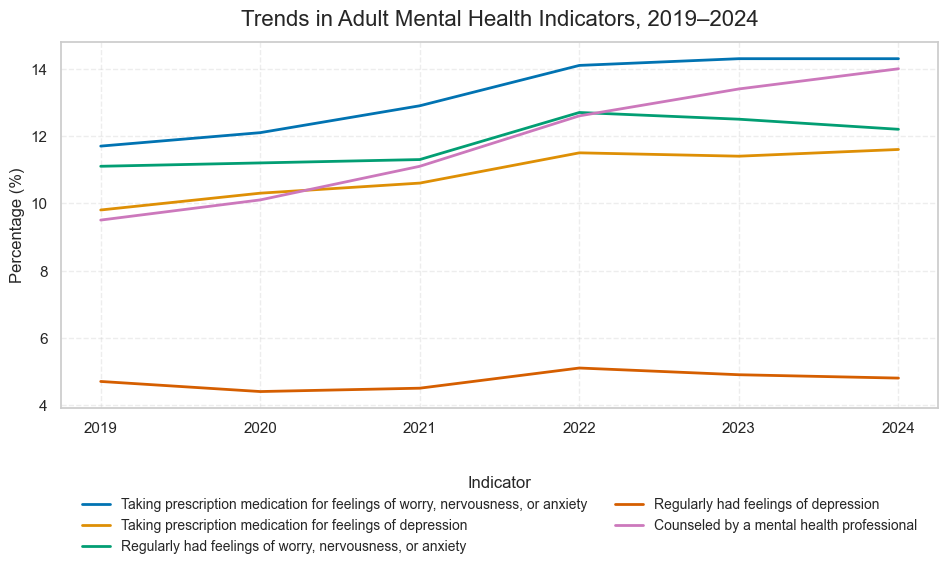

In [115]:
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")

# Convert to long format (seaborn-friendly)
long_df = macro_df.sort_values("Year")

# Plot
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=long_df,
    x="Year",
    y="Percentage",
    hue="Outcome (or Indicator)",
    linewidth=2
)

plt.xlabel("")
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Trends in Adult Mental Health Indicators, 2019–2024", fontsize=16, pad=12)
plt.grid(True, linestyle="--", alpha=0.35)

plt.legend(
    title="Indicator",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,                 
    frameon=False,
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

### 4.3 Interpretation and Discussion

- **Key Findings:**  
  The figure shows a general increase in mental health–related indicators among adults from 2019 to 2024. 
  Counseling by a mental health professional exhibits the most pronounced upward trends, while prescription medication use for anxiety and depression also increases streadily. 
  In contrast, self-reported symptoms of anxiety or depression remain relatively stable over time.

- **Clinical Insight:**  
  These patterns suggest a growing mental health burden alongside increased engagement with formal mental health services. For clinicians and policymakers, this may reflect improved awareness, reduced stigma, and greater willingness to seek professional support.

- **Design Choices:**  
  A line chart was selected to effectively illustrate temporal trends and enable comparison across multiple indicators. 
  A colour-blind–safe palette enhances accessibility. 

- **Limitations:**  
  Aggregated data mask variation across demographic subgroups and do not capture individual-level trajectories. 
  Observed trends represent correlations over time and should not be interpreted as causal relationships. 



## 5. Plot 2 - Micro View: Exploring a Nuance

### 5.1 Motivation
Building on the macro view, this plot conducts a micro-level analysis of a single indicator with a prominent upward trend - consultation with a mental health professional - by disaggregating results by age group. The objective is to identify how mental health service utilisation differs across the life course and to surface population segments with distinct patterns.

### 5.2 Visualization

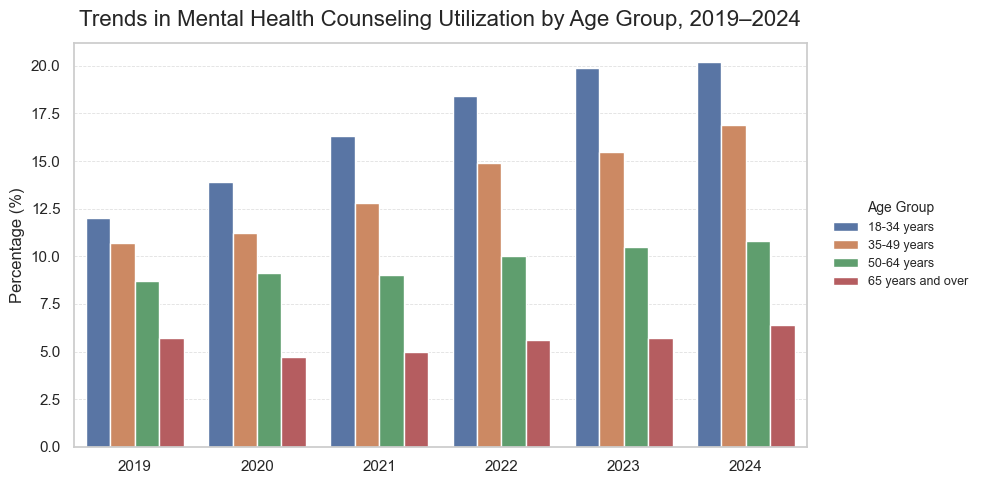

In [113]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))

sns.barplot(
    data=micro_df,
    x="Year",
    y="Percentage",
    hue="Group"
)

plt.title("Trends in Mental Health Counseling Utilization by Age Group, 2019–2024", fontsize=16, pad=12)
plt.xlabel("")
plt.ylabel("Percentage (%)", fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

plt.legend(
    title="Age Group",
    fontsize=9,
    title_fontsize=10,
    frameon=False,
    bbox_to_anchor=(1.02, 0.5),
    loc="center left"
)

plt.tight_layout()
plt.show()


### 5.3 Interpretation and Discussion

- **Key Findings:**  
  Mental health counseling utilization increased across all age groups between 2019 and 2024, with consistently higher rates among younger adults. 
  The 18–34 age group shows the steepest and most sustained growth, widening the gap relative to older adults over time. 
  In contrast, individuals aged 65 and above exhibit the lowest utilization and only modest increases, indicating persistent age-related differences in service use, indicating persistent age-related differences in service use.

- **Clinical Insight:**  
  These findings suggest that younger adults are both more affected by mental health concerns and more likely to seek professional support, potentially reflecting higher symptom burden, greater mental health literacy, or reduced stigma. 
  The comparatively low uptake among older adults may point to barriers such as access constraints, stigma, or under-recognition of mental health needs, underscoring the importance of age-sensitive outreach and service design.

- **Design Choices:**  
  A grouped bar chart enables direct comparison of counseling utilization across age groups within each year. 
  Distinct colours represent age categories, facilitating clear subgroup differentiation. 

- **Limitations:**  
  The analysis relies on aggregated survey estimates and does not account for within-group heterogeneity or differences in population size across age groups. Additionally, counseling utilization reflects service use rather than unmet need, and observed differences may be influenced by confounding factors such as insurance coverage, availability of providers, or cohort-specific attitudes toward mental health care.




## 6. Plot 3 - Actionable View: Informing Intervention

### 6.1 Motivation
This visualisation further narrows the analytical focus to **young adults aged 18–34**, identified previously as the group with the highest mental health service utilisation. Instead of self-reported measures, this plot examines **actual emergency department (ED) visits**, providing insight into acute mental health care demand and the types of conditions driving service use. The goal is to inform where and how targeted interventions may reduce high-intensity service utilisation.

Although the data are drawn from the U.S. healthcare system, the insights remain informative for a Singaporean context for three key reasons. First, young adulthood is a life stage associated with similar stressors across high-income societies, including workforce entry, academic pressure, and social transitions. Second, emergency departments in both systems function as safety-net services for acute mental health crises, making patterns of ED utilisation conceptually comparable. Third, Singapore currently lacks publicly available, diagnosis-level ED mental health data of this granularity, limiting direct local analysis.

Accordingly, this visualisation is not intended to transfer absolute utilisation rates to Singapore, but to inform directional understanding—highlighting which conditions dominate acute mental health demand among young adults and where upstream interventions may reduce pressure on emergency services. The analysis thus illustrates how such data could inform targeted prevention, service planning, and resource allocation if similar datasets were available locally.

### 6.2 Visualization

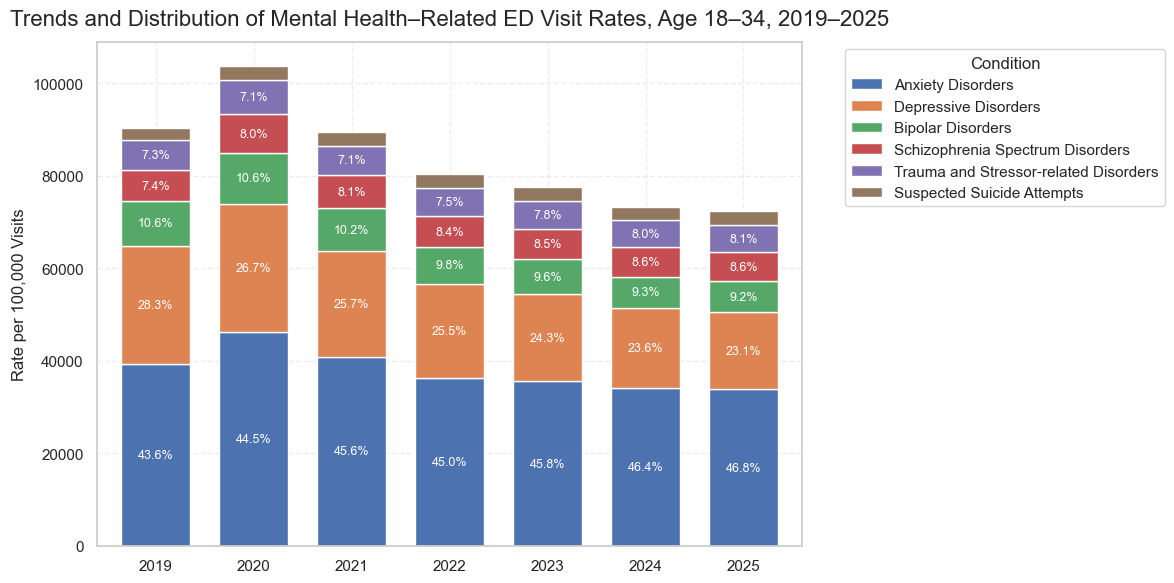

In [111]:
sns.set_theme(style="whitegrid")

# Sort conditions by total impact
condition_order = action_df.sum().sort_values(ascending=False).index
action_df = action_df[condition_order]

# Percent version for labels only
df_percent = action_df.div(action_df.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 6))

action_df.plot(kind="bar", stacked=True, ax=ax, width=0.7)

ax.set_xlabel("")
ax.set_ylabel("Rate per 100,000 Visits", fontsize=12)
ax.set_title("Trends and Distribution of Mental Health–Related ED Visit Rates, Age 18–34, 2019–2025", fontsize=16, pad=12)

# Lablel each segment with percentage
for i, year in enumerate(action_df.index):
    cumulative_height = 0
    total = action_df.loc[year].sum()

    for condition in action_df.columns:
        value = action_df.loc[year, condition]
        pct = df_percent.loc[year, condition]

        if value > 0 and pct >= 5:  # avoid clutter
            ax.text(
                i,
                cumulative_height + value / 2,
                f"{pct:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                color="white"
            )
            
        cumulative_height += value

ax.legend(
    title="Condition",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)
ax.tick_params(axis="x", labelrotation=0)

plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()


### 6.3 Interpretation and Discussion

- **Key Findings:**  
  Among adults aged 18–34, mental health–related emergency department (ED) visit rates peak around 2020–2021 and decline after 2021.
  Anxiety and depressive disorders consistently accounting for the largest share of visits. 
  Smaller but stable contributions from severe conditions (e.g., schizophrenia spectrum disorders) and suspected suicide attempts highlight ongoing high-acuity demand.

- **Clinical Insight:**  
  This pattern suggests that EDs continue to function as a critical safety net for young adults experiencing mental health distress, particularly anxiety and depression. 
  The persistent dominance of anxiety-related visits points to potential gaps in timely access to outpatient or community-based care. 
  Targeted investment in early intervention, crisis support, and primary mental health services for young adults could reduce preventable ED utilization and improve continuity of care.

- **Design Choices:**  
  A stacked bar chart was used to simultaneously convey total ED visit rates (absolute burden) and the distribution of underlying mental health conditions (composition). 
  Percentage annotations support rapid identification of dominant conditions, enabling prioritisation and resource allocation decisions.

- **Limitations:**  
  These data are shaped by U.S.-specific healthcare structures, including insurance coverage and care pathways, which differ from Singapore’s system. While relative patterns - such as the prominence of anxiety-related acute care among young adults - are likely informative, absolute rates should not be directly transferred. 
  The insights are best interpreted as directional rather than definitive.


## 7. Implications for Future Health Service Interventions
Collectively, the visualisations highlight a sustained mental health burden, pronounced age-related differences in service utilisation, and continued reliance on emergency care among young adults. For health system planners and policymakers, these findings underscore the importance of strengthening upstream mental health services, particularly for younger populations, to reduce reliance on acute care settings.

In the Singapore context, the analysis points to the value of expanding accessible community-based mental health services, improving early identification and intervention for anxiety and depressive disorders, and enhancing age-targeted outreach strategies. More broadly, the report demonstrates how integrated, well-designed visualisations can support evidence-based decision-making and highlights the need for more granular, publicly available mental health data to inform local policy and service delivery.


## 8. References
- Centers for Disease Control and Prevention. (2025). *NHIS Adult Summary Health Statistics* [Dataset]. National Center for Health Statistics. Retrieved January 30, 2026, from https://data.cdc.gov/National-Center-for-Health-Statistics/NHIS-Adult-Summary-Health-Statistics/25m4-6qqq/about_data
- Centers for Disease Control and Prevention. (2025). *National Syndromic Surveillance Program (NSSP) Mental Health-Related Emergency Department Visit Rates* [Dataset]. data.cdc.gov. Retrieved January 30, 2026, from https://data.cdc.gov/Mental-Health/National-Syndromic-Surveillance-Program-NSSP-Menta/eze9-ahe5/about_data